In [75]:
%reload_ext autoreload
%autoreload 2

In [76]:
from cereeberus import ReebGraph, MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg

import matplotlib.pyplot as plt
import numpy as np

import pulp #for ILP optimization

In [77]:
# import the ilp file. Note it is in the same folder as this notebook, we will move it to the correct location later

import cereeberus.distance.ilp as ilp

## Load example MapperGraphs



Text(0.5, 1.0, 'G')

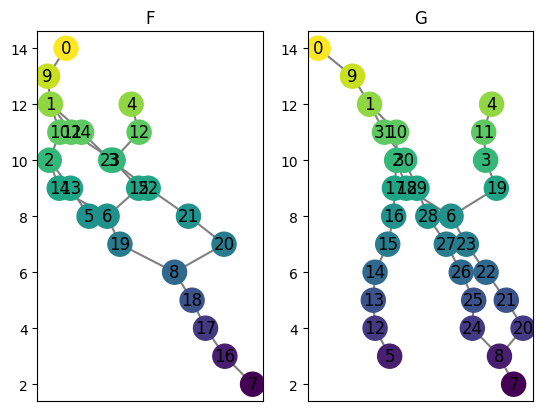

In [78]:
F = ex_mg.interleave_example_A()
G = ex_mg.interleave_example_B()
# F = ex_mg.torus(0, 2, 10, 20, delta = 1, seed = 190)
# G = ex_mg.line(0, 20)
plt.figure()
plt.subplot(121)
F.draw()
plt.title('F')
plt.subplot(122)
G.draw()
plt.title('G')

## Create the interleaving

In [79]:
myInt = Interleave(F, G, n = 2, initialize_random_maps=True, seed = 17)

# loss before optimization
print('loss before optimization: ', myInt.loss())

loss before optimization:  4.0


### This is a map before the optimization

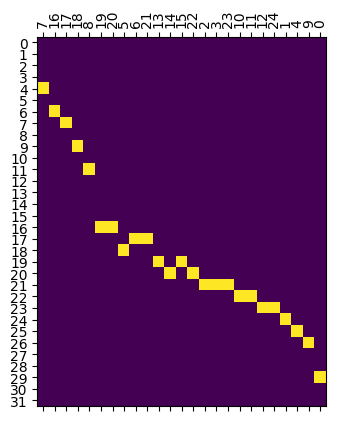

In [80]:
myInt.phi('0','V').draw()

In [81]:
optimized_maps = ilp.solve_ilp(myInt, verbose=True)[0]
loss = ilp.solve_ilp(myInt)[1]

# loss after optimization
print('loss after optimization: ', loss)

Initial loss is: None
The optimized loss is: 6.0
Status: Optimal
loss after optimization:  6.0


### This is the same map after the optimization

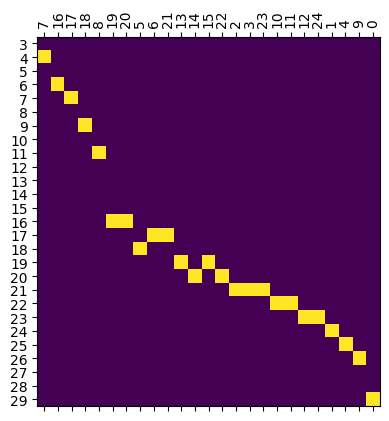

In [82]:
ilp.solve_ilp(myInt)[0]['Phi_V'].draw()